# Korea VS Finland (PISA data)

## Investigation Overview

In this investigation, I wanted to look at the math anxiety and attribution to failure in comparing Korea and Finland

## Dataset Overview

RangeIndex: 485490 entries, 0 to 485489 Columns: 636 entries, Unnamed: 0 to VER_STU dtypes: float64(250), int64(18), object(368) memory usage: 2.3+ GB

So we have results for 485'490 children between 15 years 3 months and 16 years 2 months old from around the world. Additionally we have exactly 636 columns and the whole dataset is larger than 2.5 GB. We need to find some Questions that we want to answer and only keep the columns that are needed for the data analysis.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
file = 'pisa2012.csv'
df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False, index_col=0)

In [21]:
# data wrangling

clean_df = df.copy()
clean_df = clean_df[['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10','ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08','PV1MATH','CNT']]
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ST42Q01  313855 non-null  object 
 1   ST42Q03  312176 non-null  object 
 2   ST42Q05  312624 non-null  object 
 3   ST42Q08  312456 non-null  object 
 4   ST42Q10  312853 non-null  object 
 5   ST44Q01  314119 non-null  object 
 6   ST44Q03  313405 non-null  object 
 7   ST44Q04  312645 non-null  object 
 8   ST44Q05  312996 non-null  object 
 9   ST44Q07  312970 non-null  object 
 10  ST44Q08  313374 non-null  object 
 11  PV1MATH  485490 non-null  float64
 12  CNT      485490 non-null  object 
dtypes: float64(1), object(12)
memory usage: 51.9+ MB


In [22]:
# Rename the column names

clean_df = clean_df[(clean_df['CNT'] == 'Korea') | (clean_df['CNT'] == 'Finland')]
clean_df.rename(columns = {'ST42Q01' : 'MA_1', 'ST42Q03' : 'MA_2', 'ST42Q05' : 'MA_3', 'ST42Q08' : 'MA_4', 'ST42Q10' : 'MA_5'}, inplace = True)
clean_df.rename(columns = {'ST44Q01' : 'AF_1','ST44Q03' : 'AF_2','ST44Q04' : 'AF_3','ST44Q05': 'AF_4','ST44Q07':'AF_5','ST44Q08':'AF_6'}, inplace = True)
clean_df.rename(columns = {'PV1MATH' : 'Score'}, inplace = True)
clean_df.rename(columns = {'CNT' : 'Country'}, inplace = True)

In [23]:
# Handle the Strongly agree, agree, disagree, Strongly disagree, nan value : Math anxiety

def result(x):
    if x == 'Disagree':
        return 0
    elif x == 'Strong disagree':
        return 0
    elif x == 'Agree':
        return 1
    elif x == 'Strongly agree':
        return 2
    else : 
        pass 
    
clean_df['MA_1'] = clean_df['MA_1'].apply(result)
clean_df['MA_1'] = clean_df['MA_1'].fillna(clean_df['MA_1'].mean())

clean_df['MA_2'] = clean_df['MA_2'].apply(result)
clean_df['MA_2'] = clean_df['MA_2'].fillna(clean_df['MA_2'].mean())

clean_df['MA_3'] = clean_df['MA_3'].apply(result)
clean_df['MA_3'] = clean_df['MA_3'].fillna(clean_df['MA_3'].mean())

clean_df['MA_4'] = clean_df['MA_4'].apply(result)
clean_df['MA_4'] = clean_df['MA_4'].fillna(clean_df['MA_4'].mean())

clean_df['MA_5'] = clean_df['MA_5'].apply(result)
clean_df['MA_5'] = clean_df['MA_5'].fillna(clean_df['MA_5'].mean())



In [24]:
# New column : Anxiety

clean_df['Anxiety'] = clean_df['MA_1'] + clean_df['MA_2'] + clean_df['MA_3'] + clean_df['MA_4'] + clean_df['MA_5']

In [25]:
# # Handle the Strongly agree, agree, disagree, Strongly disagree, nan value : Attribution to failure

def result(x):
    if x == 'Not at all likely':
        return 0
    elif x == 'Slightly likely':
        return 1
    elif x == 'Likely':
        return 2
    elif x == 'Very Likely':
        return 3
    else : 
        pass 

clean_df['AF_1'] = clean_df['AF_1'].apply(result)
clean_df['AF_1'] = clean_df['AF_1'].fillna(clean_df['AF_1'].mean())

clean_df['AF_2'] = clean_df['AF_2'].apply(result)
clean_df['AF_2'] = clean_df['AF_2'].fillna(clean_df['AF_2'].mean())

clean_df['AF_3'] = clean_df['AF_3'].apply(result)
clean_df['AF_3'] = clean_df['AF_3'].fillna(clean_df['AF_3'].mean())

clean_df['AF_4'] = clean_df['AF_4'].apply(result)
clean_df['AF_4'] = clean_df['AF_4'].fillna(clean_df['AF_4'].mean())

clean_df['AF_5'] = clean_df['AF_5'].apply(result)
clean_df['AF_5'] = clean_df['AF_5'].fillna(clean_df['AF_5'].mean())

clean_df['AF_6'] = clean_df['AF_6'].apply(result)
clean_df['AF_6'] = clean_df['AF_6'].fillna(clean_df['AF_6'].mean())

In [26]:
# Final DataFrame

clean_df.sample(5)

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country,Anxiety
182009,1.000000,0.00000,1.000000,1.0000,1.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,465.6566,Finland,4.000000
179675,2.000000,2.00000,2.000000,2.0000,2.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,413.8573,Finland,10.000000
176538,1.000000,1.00000,0.000000,1.0000,1.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,477.1849,Finland,4.000000
178690,0.000000,0.00000,0.000000,0.0000,0.000000,1.32181,1.000000,1.000000,0.000000,2.000000,2.000000,591.3772,Finland,0.000000
295440,0.887345,0.37226,0.460913,0.5368,1.009916,2.00000,1.000000,2.000000,2.000000,0.000000,1.000000,538.4873,Korea,3.267234


## Type of Math anxiety

Here are 5 types of Math Anxiety throughout the country

MA_1 : Worry that math will be difficult<br/>
MA_2 : Get very Tense<br/>
MA_3 : Get very Nervous<br/>
MA_4 : Feel Helpless<br/>
MA_5 : Worry about getting poor grades

Most of student are worried about getting poor grades in math test

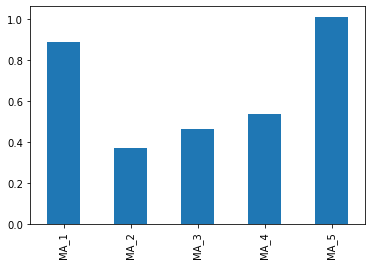

In [27]:
df_1 = clean_df[['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()
df_1.plot(kind = 'bar')

## Attribution to failure

Here are 6 types of Attribution type

AF_1 : I'm not good at math<br/>
AF_2 : Teacher did not explain well<br/>
AF_3 : Bad guesses<br/>
AF_4 : Material Too Hard<br/>
AF_5 : Teacher didn't get students Interested<br/>
AF_6 : Unlucky<br/>

Many of students tend to attribute their failure to the material that they had.

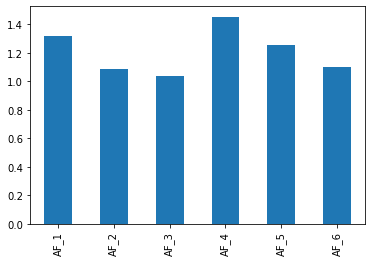

In [28]:
df_2 = clean_df[['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()
df_2.plot(kind = 'bar')

## Distribution of Math score

According to the visualization, we can see the math score seems quite normally distributed.

(array([4.000e+00, 5.800e+01, 4.260e+02, 1.597e+03, 3.558e+03, 4.245e+03,
        2.848e+03, 9.920e+02, 1.250e+02, 9.000e+00]),
 array([113.1095 , 190.93315, 268.7568 , 346.58045, 424.4041 , 502.22775,
        580.0514 , 657.87505, 735.6987 , 813.52235, 891.346  ]),
 <a list of 10 Patch objects>)

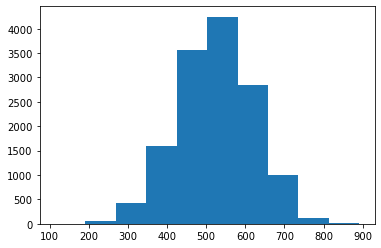

In [29]:
clean_df['Score'].mean()
plt.hist(clean_df['Score'])

## Korea VS Finland : Math Anxiety

As I assumed before, student living in korea more tend to feel anxiety about math than Filand student. Every type of anxiety have appeared the most in Korea

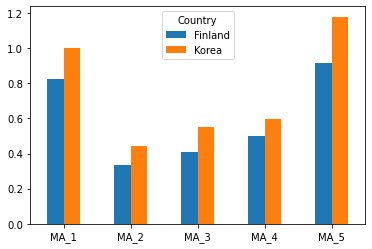

In [30]:
country_mean = clean_df.groupby('Country')[['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()
country_mean = country_mean.transpose()
country_mean
country_mean.plot.bar(rot=0)

## Korea VS Finland : Attribution to Failure

Both of two country, they tend to think that they got a low math grade because of the material. Korean student didn't think their teach was not good at teaching math, rather than thinking it's my own fault. The Finland student think that their teacher didn't so get interested about math that we got bad score in math.

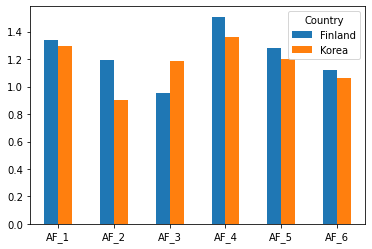

In [31]:
country_att = clean_df.groupby('Country')[['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()
att_mean = country_att.transpose()
att_mean.plot.bar(rot=0)

## Correlationship between variables

I thought the more they concerned about their math, the less they get high score in math test. Unfortunately they don't have clear correlationship between variables that I used. 

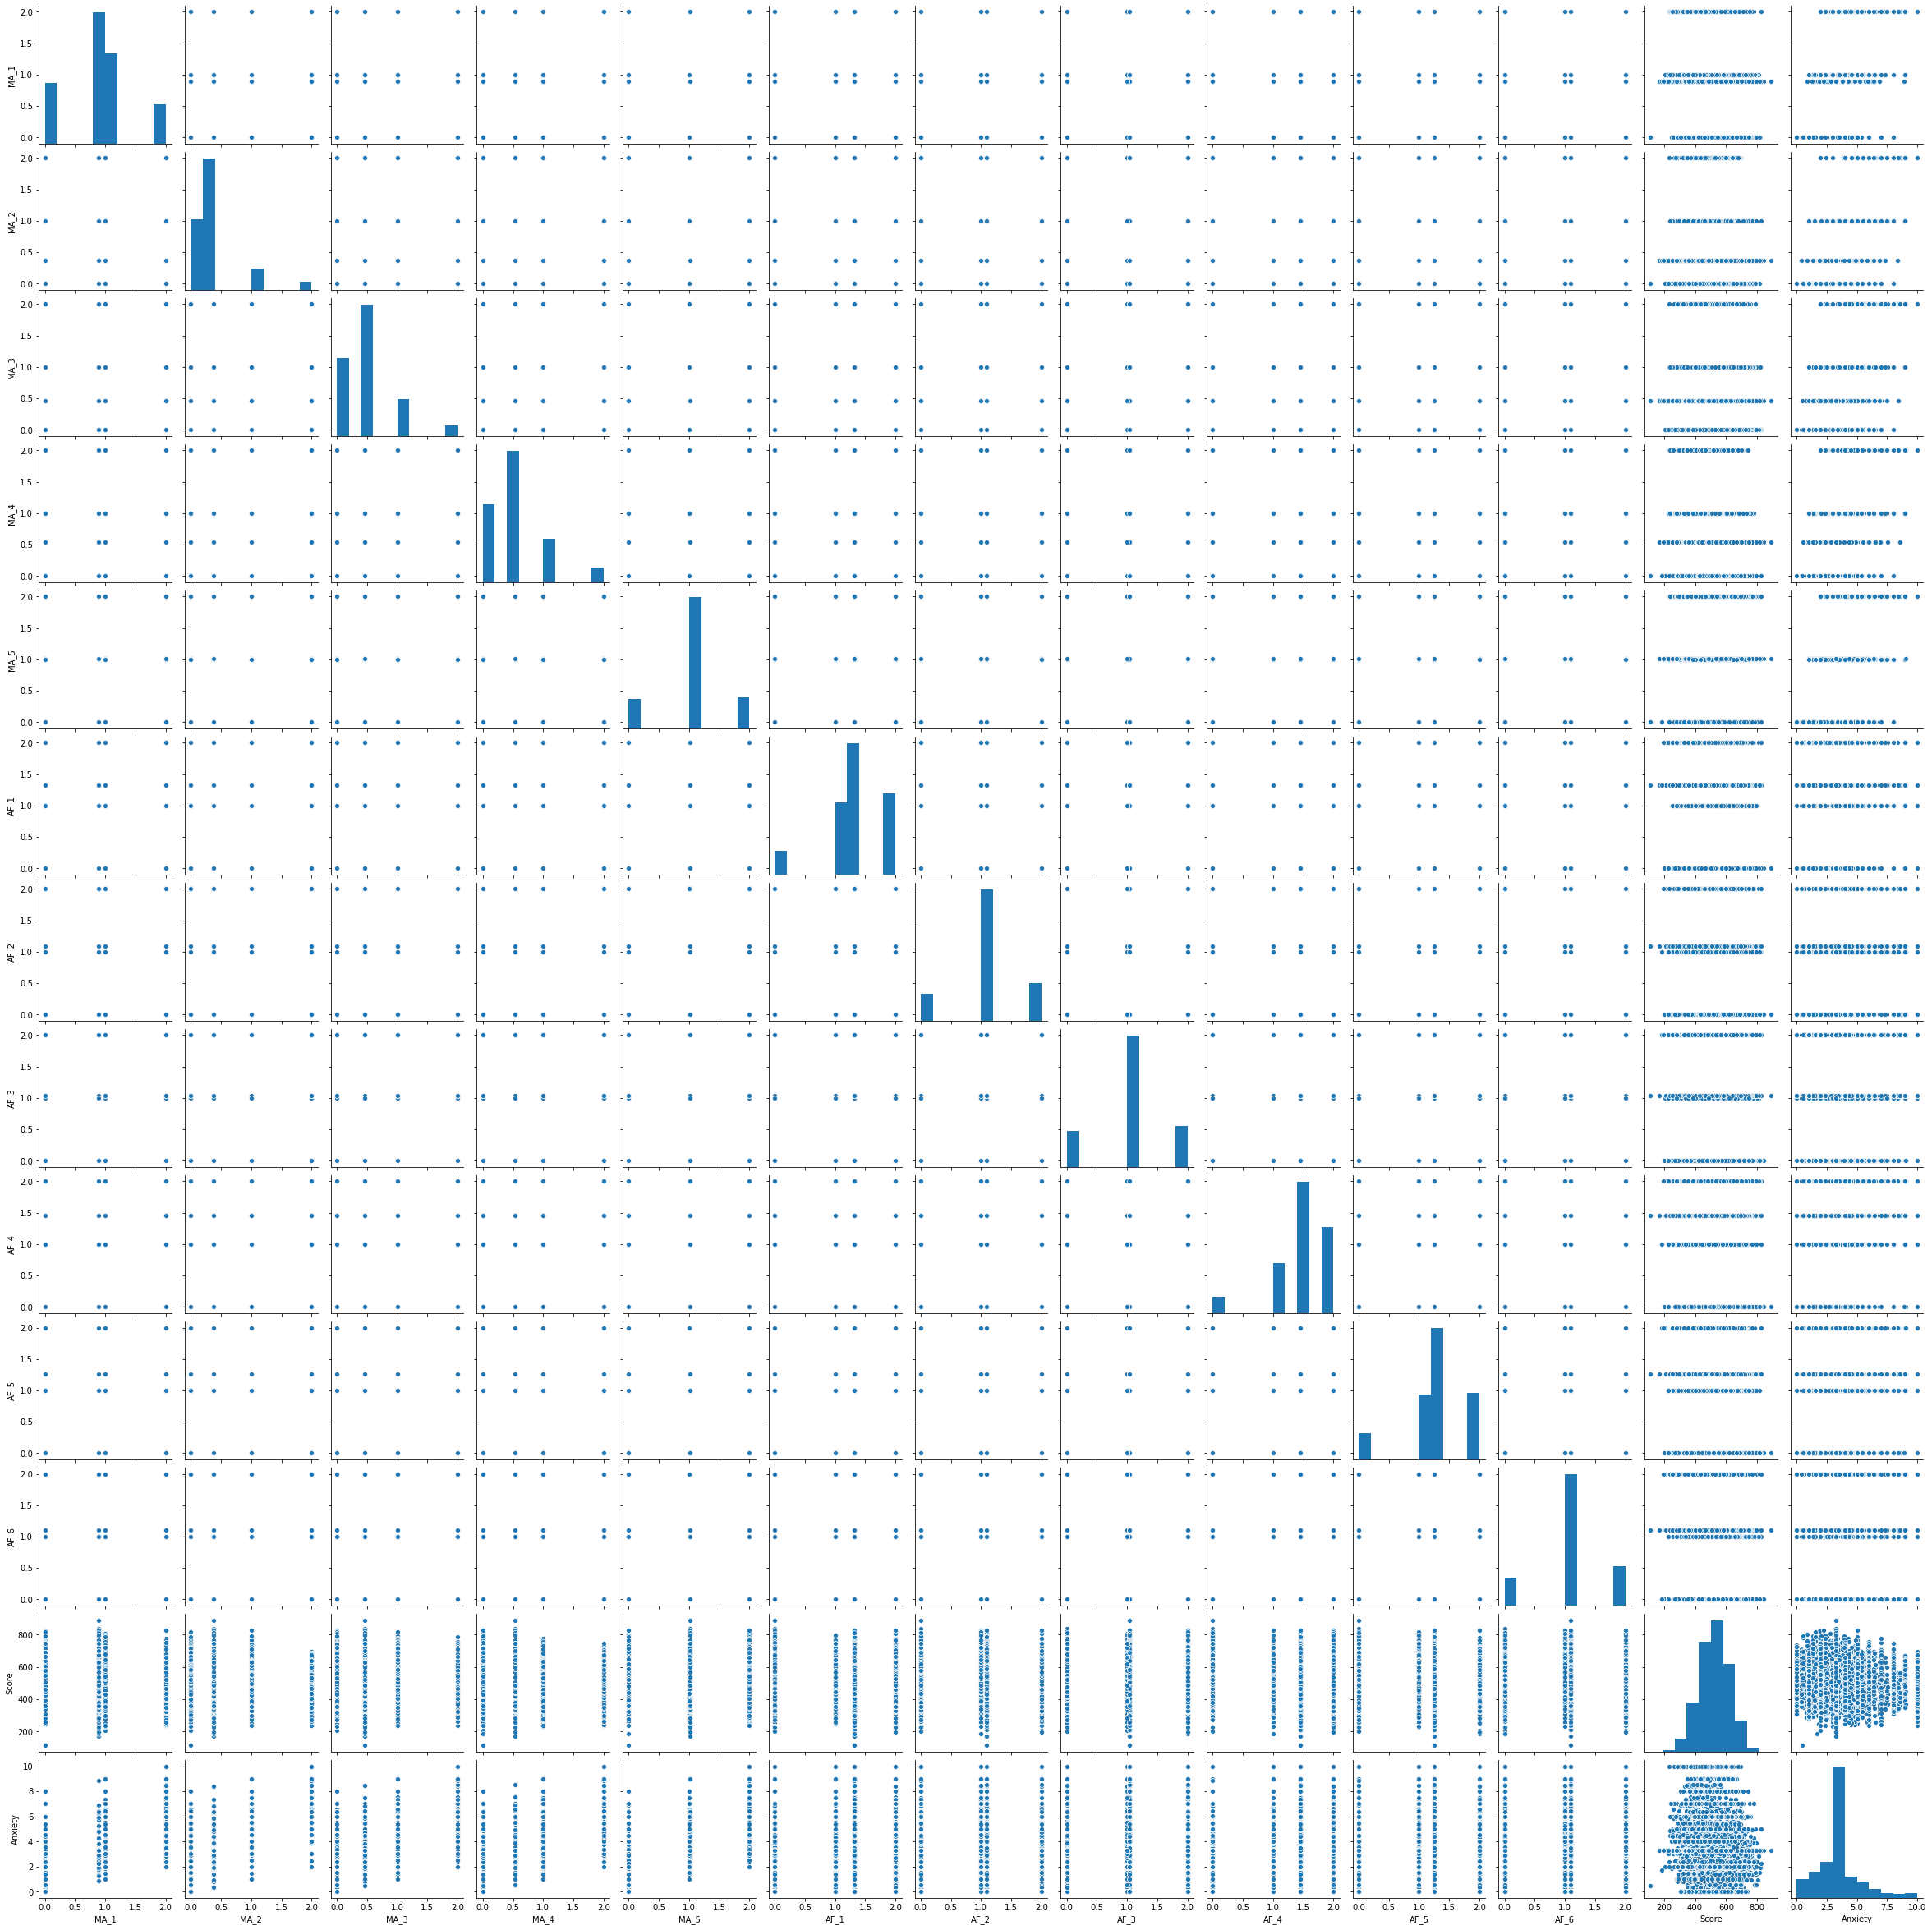

In [32]:
import seaborn as sns
sns.pairplot(clean_df)